In [2]:
import os
import sys
sys.path.append("..")
from roeProcessTools import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
zhfont = FontProperties(fname="/System/Library/Fonts/PingFang.ttc")

In [28]:
from datetime import datetime

In [1]:
dirPath = "data/"
roePath = "111家roe数据.csv"
cfPath = "111家cf数据.csv"
markPath = "both.csv"  # 检验的标记信息

In [3]:
roe = pd.read_csv(roePath)
cf = pd.read_csv(cfPath)
mark = pd.read_csv(markPath)

In [4]:
mark.head()

,code,name,mark,startTime_roe,check,industry,startTime_cf,check.1,both
0,000799.SZ,酒鬼酒,I,2014-12,1.0,食品饮料,2020-03,1.0,1.0
1,002216.SZ,三全食品,I,2017-03,1.0,食品饮料,2019-12,1.0,1.0
2,002568.SZ,百润股份,I,2017-06,1.0,食品饮料,2017-09,1.0,1.0
3,002661.SZ,克明面业,I,2018-06,1.0,食品饮料,2018-06,1.0,1.0
4,600809.SH,山西汾酒,I,2015-09,1.0,食品饮料,2018-12,1.0,1.0


In [5]:
roe.head()

,code,name,2000-06,2000-09,2000-12,2001-06,2001-09,2001-12,2002-03,2002-06,...,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09,2020-12,2000-03,2001-03
0,000799.SZ,酒鬼酒,6.2118,NaN,-28.0358,23.5360,NaN,38.1242,38.1242,9.8169,...,16.3536,18.8966,23.9583,25.2602,23.0045,32.3351,43.2680,NaN,NaN,NaN
1,002216.SZ,三全食品,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.1807,4.1839,3.7637,6.5387,13.9329,20.7155,21.9265,NaN,NaN,NaN
2,002568.SZ,百润股份,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.5604,35.2106,34.0857,36.1263,40.6853,38.2092,42.7260,NaN,NaN,NaN
3,002661.SZ,克明面业,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9643,6.8557,5.5648,12.5492,12.5285,15.7374,13.2463,NaN,NaN,NaN
4,600809.SH,山西汾酒,4.4988,NaN,-1.3841,1.7382,-1.3841,20.7703,20.7703,22.6412,...,31.6392,24.9314,21.6768,25.8967,5.8295,21.0466,22.5552,NaN,NaN,NaN


## 以roe为例绘制图像

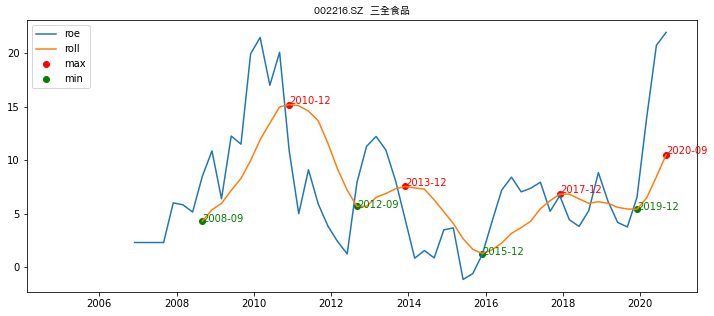

In [6]:
fig, axs = showOne("002216", roe)

In [7]:
from tools import *

In [18]:
codes = mark.code.values
startTime_cfs = mark.startTime_cf.values
startTime_roes = mark.startTime_roe.values
code = codes[0]
startTime_cf = startTime_cfs[0]
startTime_roe = startTime_roes[0]
earlyTime = getEarlyTime(startTime_roe, startTime_cf)

In [19]:
price = getPriceData(code, earlyTime)

In [20]:
price.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000799.SZ,20201231,154.51,158.80,151.86,156.50,153.99,2.51,1.6300,135903.94,2112010.281
1,000799.SZ,20201230,144.16,154.78,143.50,153.99,144.88,9.11,6.2880,167853.06,2518328.321
2,000799.SZ,20201229,145.00,146.68,139.27,144.88,140.34,4.54,3.2350,198647.06,2850951.003
3,000799.SZ,20201228,133.00,140.34,133.00,140.34,127.58,12.76,10.0016,118251.86,1646735.579
4,000799.SZ,20201225,124.43,128.88,122.43,127.58,125.43,2.15,1.7141,95324.46,1204740.228


In [39]:
price["trade_date"] = pd.to_datetime(price["trade_date"], format="%Y%m%d")

In [24]:
quarterly = price.resample("Q", on="trade_date").mean()

In [26]:
close = quarterly["close"]

In [49]:
# price的x轴
# xPrice = [each.date() for each in close.index]

In [51]:
yPrice = price["close"]

In [48]:
xPrice = [each.date() for each in price["trade_date"]]

In [52]:
axs.plot(xPrice, yPrice, label="price")
axs.legend()

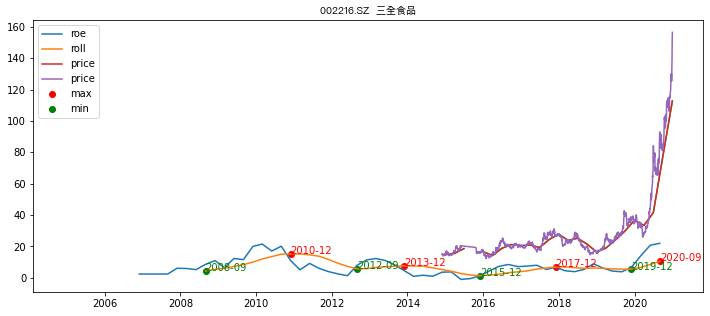

In [53]:
fig

In [77]:
company = roe[roe["code"].str.contains(code)]

In [78]:
company

,code,name,2000-06,2000-09,2000-12,2001-06,2001-09,2001-12,2002-03,2002-06,...,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09,2020-12,2000-03,2001-03
0,000799.SZ,酒鬼酒,6.2118,NaN,-28.0358,23.536,NaN,38.1242,38.1242,9.8169,...,16.3536,18.8966,23.9583,25.2602,23.0045,32.3351,43.268,NaN,NaN,NaN


In [79]:
company = company.dropna(axis=1)

In [80]:
company

,code,name,2000-06,2000-12,2001-06,2001-12,2002-03,2002-06,2002-09,2002-12,...,2018-06,2018-09,2018-12,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09
0,000799.SZ,酒鬼酒,6.2118,-28.0358,23.536,38.1242,38.1242,9.8169,38.1242,52.629,...,29.3604,21.3855,17.8835,16.3536,18.8966,23.9583,25.2602,23.0045,32.3351,43.268


In [81]:
idx = company.columns.get_indexer(("2010-03",))[0]

In [82]:
idx

38

In [83]:
company

,code,name,2000-06,2000-12,2001-06,2001-12,2002-03,2002-06,2002-09,2002-12,...,2018-06,2018-09,2018-12,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09
0,000799.SZ,酒鬼酒,6.2118,-28.0358,23.536,38.1242,38.1242,9.8169,38.1242,52.629,...,29.3604,21.3855,17.8835,16.3536,18.8966,23.9583,25.2602,23.0045,32.3351,43.268


In [88]:
temp = pd.concat([company.iloc[:, :2], company.iloc[:, idx:]], axis=1)

In [89]:
temp

,code,name,2010-03,2010-06,2010-09,2010-12,2011-03,2011-06,2011-09,2011-12,...,2018-06,2018-09,2018-12,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09
0,000799.SZ,酒鬼酒,10.6206,0.2572,0.7729,17.9275,28.8686,35.4842,31.2588,63.1322,...,29.3604,21.3855,17.8835,16.3536,18.8966,23.9583,25.2602,23.0045,32.3351,43.268


In [59]:
markRow = mark[mark["code"].str.contains(code)]

In [60]:
markRow

,code,name,mark,startTime_roe,check,industry,startTime_cf,check.1,both
0,000799.SZ,酒鬼酒,I,2014-12,1.0,食品饮料,2020-03,1.0,1.0


In [64]:
markRow.iloc[0, 6]

'2020-03'

In [107]:
def plotIt(code, df:pd.DataFrame, mark:pd.DataFrame):
    '''
    Description:
    绘制股价和roe或cf等数据的图表
    ---
    Params:
    df, DataFrame, roe 或cf数据
    mark, DataFrame, 标记数据
    ---
    Returns:
    '''
    # 获取时间信息
    markRow = mark[mark["code"].str.contains(code)]
    startTime_roe = markRow.iloc[0, 3]
    startTime_cf = markRow.iloc[0, 6]
    earlyTime = getEarlyTime(startTime_roe, startTime_cf)
    # 获取股价信息，注意股价文件放在data中
    price = getPriceData(code, earlyTime)
    price["trade_date"] = pd.to_datetime(price["trade_date"], format="%Y%m%d")
    yPrice = price["close"]
    xPrice = [each.date() for each in price["trade_date"]]
    # 获取公司数据信息，取2010-03之后的数据
    company = df[df["code"].str.contains(code)]
    company = company.dropna(axis=1)
    idx = company.columns.get_indexer(("2010-03",))[0]
    temp = pd.concat([company.iloc[:, :2], company.iloc[:, idx:]], axis=1)
    fig, axs = showOne(code, temp, center=False)
    ax2 = axs.twinx()
    ax2.plot(xPrice, yPrice, label="price", c="crimson")
    ax2.legend()

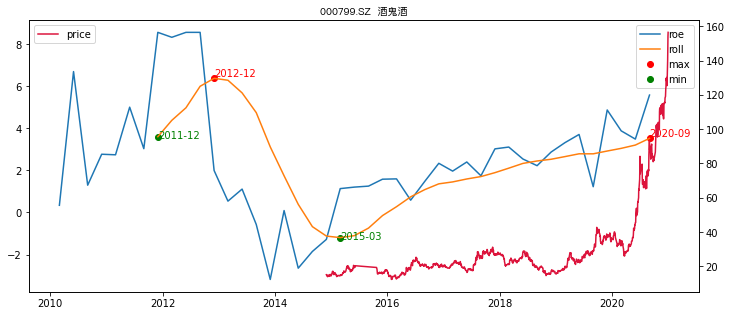

In [108]:
plotIt(code, cf, mark)

## test